In [7]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
import pandas as pd

In [8]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240912_140309.braidz")

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240912_140309.braidz using pyarrow


In [9]:
df,csvs["opto"]

(         obj_id    frame     timestamp         x         y         z  \
 0             1    13075  1.726143e+09  0.057705  0.041534  0.219767   
 1             1    13076  1.726143e+09  0.058230  0.041373  0.220245   
 2             1    13077  1.726143e+09  0.058763  0.041229  0.220752   
 3             1    13078  1.726143e+09  0.059215  0.041151  0.221258   
 4             1    13079  1.726143e+09  0.059614  0.041063  0.221717   
 ...         ...      ...           ...       ...       ...       ...   
 4724652   74659  8372094  1.726226e+09  0.110655  0.171949  0.042212   
 4724653   74659  8372095  1.726226e+09  0.109312  0.173310  0.042279   
 4724654   74659  8372096  1.726226e+09  0.107926  0.174640  0.042355   
 4724655   74659  8372097  1.726226e+09  0.106521  0.175945  0.042425   
 4724656   74659  8372098  1.726226e+09  0.105086  0.177291  0.042578   
 
              xvel      yvel      zvel           P00           P01  \
 0        0.056760 -0.016160  0.055179  7.919500e-08

In [4]:
timestamps = []
for idx, row in csvs["opto"].iterrows():
    obj_id = int(row.obj_id)
    frame = int(row.frame)

    timestamps.append(df[(df.obj_id == obj_id) & (df.frame == frame)].timestamp.values)

In [5]:
df = pd.DataFrame(timestamps, columns=['timestamp'])
df.to_csv('timestamps.csv', index=False)

In [10]:
data = extract_stimulus_centered_data(df, csvs["opto"])

In [11]:
median_obj_id = filtering.filter_by_median_position(df, xlim=[-0.2, 0.2], ylim=[-0.2, 0.2], zlim=[0.1, 0.3])
duration_obj_id = filtering.filter_by_duration(df, threshold=5)

shared_elements = set(median_obj_id) & set(duration_obj_id)
shared_elements

{14,
 62,
 1392,
 1520,
 1912,
 2993,
 4897,
 4981,
 6892,
 8430,
 9836,
 13266,
 13269,
 15660,
 21976,
 31155,
 52821,
 54828,
 58989,
 64935,
 65214,
 65443}

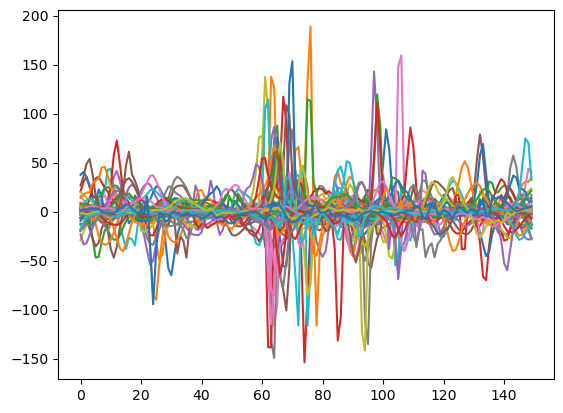

In [12]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

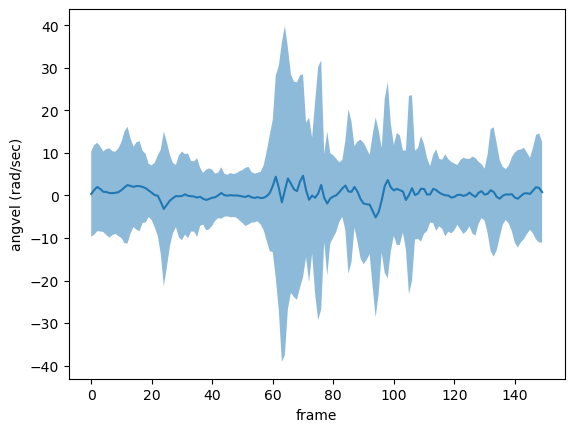

In [13]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

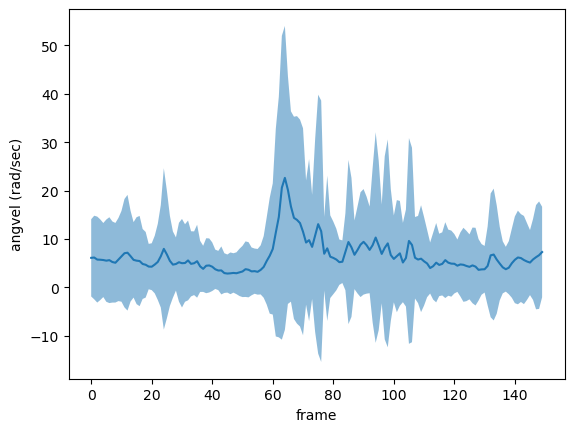

In [14]:
fig, ax = plt.subplots()
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

<Axes: >

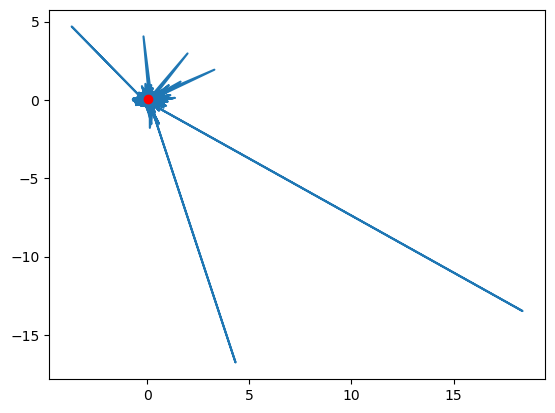

In [15]:
plot_trajectory(df)

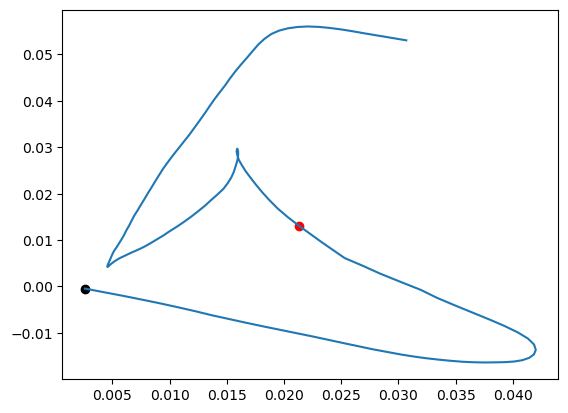

In [16]:
i = 7
traj = data["position"][i]

fig = plt.figure()
plt.plot(traj[:,0], traj[:,1])
plt.scatter(traj[50,0], traj[50,1], color="red")
plt.scatter(traj[0,0], traj[0,1], color="black")
plt.show()

In [17]:
data1_max = np.max(np.abs(np.asarray(data["angular_velocity"])[:, 50:80]), axis=1)

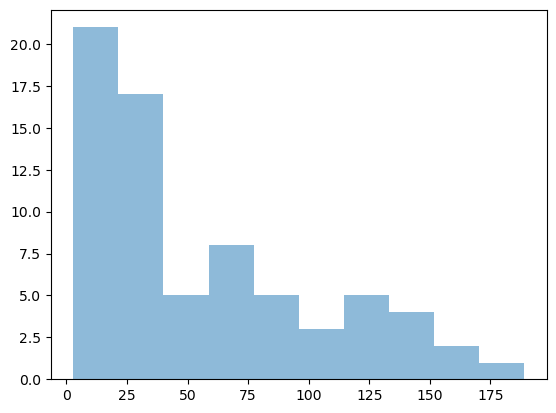

In [18]:
plt.figure()
plt.hist(data1_max, alpha=0.5)
plt.show()

In [19]:
mean_data = np.mean(data1_max)
print(mean_data)
std_dev = np.std(data1_max, ddof=1)  
std_error = std_dev / np.sqrt(len(data1_max))
print(f"Standard Deviation of data1_max: {std_dev:.4f}")
print(f"Standard Error of data1_max: {std_error:.4f}")

54.450093062726374
Standard Deviation of data1_max: 47.3067
Standard Error of data1_max: 5.6143


In [20]:
print(f"Shape of data1_max: {data1_max.shape}")
flattened_data = data1_max.ravel()
print(f"Shape of flattened data: {flattened_data.shape}")
k2, p_value = stats.normaltest(flattened_data)
print(f"D'Agostino's K-squared Test Statistic: {k2}")
print(f"P-value: {p_value}")

Shape of data1_max: (71,)
Shape of flattened data: (71,)
D'Agostino's K-squared Test Statistic: 8.660525781263791
P-value: 0.013164086320174075
